In [1]:
import pandas as pd

In [2]:
series = pd.read_csv("./series.csv")
series = series[series["合约系列"] != "小计"]
series["合约系列"] = series["合约系列"].apply(lambda x: x.strip())
series = series.loc[series.groupby("trade_date")["持仓量"].idxmax(), :].set_index(["trade_date", "合约系列"])
# 11.25似乎是au2412集体平仓的日子，当日应开始交易au2502，故以持仓量为筛选标准
series

,,成交量,持仓量,持仓量变化,成交额,行权量,隐含波动率
trade_date,合约系列,,,,,,
11/01/2024,au2412,118823,78321,1156,58333.520,0,0.243973
11/04/2024,au2412,92282,78782,461,44226.686,0,0.251494
11/05/2024,au2412,76203,79186,404,33590.252,0,0.247138
11/06/2024,au2412,121009,81294,2108,56180.084,1,0.258216
11/07/2024,au2412,134971,78367,-2927,58951.904,91,0.232901
11/08/2024,au2412,85726,78472,105,29228.942,1,0.215678
11/11/2024,au2412,92188,76409,-2063,28446.856,61,0.207584
11/12/2024,au2412,130942,72947,-3462,41830.198,76,0.194003
11/13/2024,au2412,82232,70313,-2634,22759.900,202,0.190063


In [29]:
contracts = pd.read_csv("./contracts.csv")
contracts["合约系列"] = contracts["合约代码"].apply(lambda x: x[:6])
contracts = contracts.set_index(["trade_date", "合约系列"]).loc[series.index, :].reset_index()
contracts["C/P"] = contracts["合约代码"].apply(lambda x: x[6])
contracts["trade_date"] = pd.to_datetime(contracts["trade_date"])
# 持仓量 or 成交量 or 价格最大/最小 ?
contracts = contracts.loc[contracts.groupby([contracts["trade_date"], contracts["C/P"]])["成交量"].idxmax(), :].set_index(["trade_date", "C/P"])
contracts

合约系列                            合约代码    开盘价    最高价   最低价  \
trade_date C/P                                                               
2024-11-01 C    au2412  au2412C640                      11.02  11.02  7.28   
           P    au2412  au2412P600                       3.62   5.10  3.62   
2024-11-04 C    au2412  au2412C640                       9.00  10.48  6.08   
           P    au2412  au2412P600                       4.04   4.70  3.52   
2024-11-05 C    au2412  au2412C640                       7.64   7.64  5.46   
           P    au2412  au2412P600                       4.10   5.00  4.02   
2024-11-06 C    au2412  au2412C640                       7.10   9.20  5.00   
           P    au2412  au2412P600                       4.48   4.92  3.50   
2024-11-07 C    au2412  au2412C640                       4.88   5.12  2.18   
           P    au2412  au2412P600                       6.20   6.44  4.66   
2024-11-08 C    au2412  au2412C640                       2.80   3.06  1.76   
           P    au2412  au2412P600                       5.00   5.00  3.04   
2024-11-11 C    au2412  au2412C640                       2.00   2.80  1.26   
           P    au2412  au2412P600                       3.18   3.18  2.36   
2024-11-12 C    au2412  au2412C616                       7.00   7.00  3.06   
           P    au2412  au2412P600                       3.00   5.44  3.00   
2024-11-13 C    au2412  au2412C616                       2.68   3.56  2.38   
           P    au2412  au2412P600                       4.70   5.78  4.20   
2024-11-14 C    au2412  au2412C616                       2.86   3.16  0.92   
           P    au2412  au2412P584                       1.10   3.78  1.10   
2024-11-15 C    au2412  au2412C600                       4.00   5.12  3.28   
           P    au2412  au2412P584                       3.16   3.70  2.04   
2024-11-18 C    au2412  au2412C600                       4.40   7.42  3.10   
           P    au2412  au2412P584                       2.60   2.94  1.26   
2024-11-19 C    au2412  au2412C616                       1.52   2.84  1.32   
           P    au2412  au2412P600                       4.70   5.10  1.86   
2024-11-20 C    au2412  au2412C616                       3.76   4.32  2.02   
           P    au2412  au2412P600                       1.48   2.32  0.82   
2024-11-21 C    au2412  au2412C616                       2.40   5.14  2.24   
           P    au2412  au2412P608                       2.80   2.80  0.90   
2024-11-22 C    au2412  au2412C624                       1.30   3.80  0.84   
           P    au2412  au2412P616                       2.66   3.20  0.48   
2024-11-25 C    au2502  au2502C680                       5.16   5.16  1.60   
           P    au2502  au2502P600                       6.10   8.28  5.78   
2024-11-26 C    au2502  au2502C680                       2.92   3.26  1.82   
           P    au2502  au2502P600                       7.02  11.54  7.02   
2024-11-27 C    au2502  au2502C632                       8.40   9.38  7.40   
           P    au2502  au2502P600                       9.02  10.80  7.80   
2024-11-28 C    au2502  au2502C632                       9.22  10.08  6.34   
           P    au2502  au2502P600                       7.66  10.28  7.56   
2024-11-29 C    au2502  au2502C632                       8.10   9.46  6.92   
           P    au2502  au2502P600                       7.88   9.06  6.70   
2024-12-02 C    au2502  au2502C632                       7.46   9.48  6.28   
           P    au2502  au2502P600                       6.80   8.98  6.38   
2024-12-03 C    au2502  au2502C632                       8.06   9.44  7.28   
           P    au2502  au2502P600                       7.04   7.46  5.92   
2024-12-04 C    au2502  au2502C632                       9.00   9.64  7.84   
           P    au2502  au2502P600                       6.50   6.72  5.72   
2024-12-05 C    au2502  au2502C632                       7.20   9.00  6.98   
           P    au2502  au2502P600      

In [55]:
# 收盘价 or 结算价 ?
price = pd.read_csv("./contracts.csv",index_col=[0, 1], parse_dates=True)["收盘价"]
price

C:\Users\Lee\AppData\Local\Temp\ipykernel_20856\460256599.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  price = pd.read_csv("./contracts.csv",index_col=[0, 1], parse_dates=True)["收盘价"]


trade_date  合约代码                          
2024-11-01  au2412C448                        181.16
            au2412C456                        172.72
            au2412C464                        164.72
            au2412C472                        156.72
            au2412C480                        148.72
                                               ...  
2024-12-10  au2508P712                         93.64
            au2508P720                        100.44
            au2508P728                        107.38
            au2508P736                        114.46
            au2508P744                        121.64
Name: 收盘价, Length: 10564, dtype: float64

In [66]:
# 假想的信号表

position = contracts.reset_index().set_index(["trade_date", "合约代码"])["收盘价"]
position = position.apply(lambda x: int(x))
position.name = "仓位"
position

trade_date  合约代码                          
2024-11-01  au2412C640                         8
            au2412P600                         4
2024-11-04  au2412C640                         6
            au2412P600                         4
2024-11-05  au2412C640                         7
            au2412P600                         4
2024-11-06  au2412C640                         5
            au2412P600                         4
2024-11-07  au2412C640                         2
            au2412P600                         5
2024-11-08  au2412C640                         1
            au2412P600                         3
2024-11-11  au2412C640                         1
            au2412P600                         2
2024-11-12  au2412C616                         3
            au2412P600                         4
2024-11-13  au2412C616                         2
            au2412P600                         4
2024-11-14  au2412C616                         1
            au2412P584    

In [99]:
# 回测
init_val = 100000
pos_val_prev = (price * position * 100).dropna().groupby(level="trade_date").sum().shift(1).dropna()
pos_val_curr = (price * position.unstack().shift(1).stack() * 100).dropna().groupby(level="trade_date").sum()
ret = pos_val_curr - pos_val_prev
acc_ret = ret.cumsum()
value = pd.concat([(acc_ret + init_val), pd.Series(init_val, index=[pd.to_datetime("2024-11-01")])]).sort_index()
unit_val = (value / init_val).resample()
ret_rate = (unit_val / unit_val.shift(1) - 1).fillna(0)
unit_val

2024-11-01    1.00000
2024-11-04    0.98208
2024-11-05    0.98620
2024-11-06    0.97622
2024-11-07    0.96192
2024-11-08    0.95084
2024-11-11    0.94844
2024-11-12    0.95160
2024-11-13    0.95082
2024-11-14    0.97070
2024-11-15    0.96952
2024-11-18    0.97198
2024-11-19    1.00440
2024-11-20    1.00230
2024-11-21    1.00652
2024-11-22    1.02748
2024-11-25    1.01644
2024-11-26    1.03120
2024-11-27    1.00864
2024-11-28    1.00092
2024-11-29    0.99806
2024-12-02    0.98582
2024-12-03    0.98404
2024-12-04    0.97660
2024-12-05    0.97496
2024-12-06    0.96934
2024-12-09    0.96658
2024-12-10    0.96496
dtype: float64

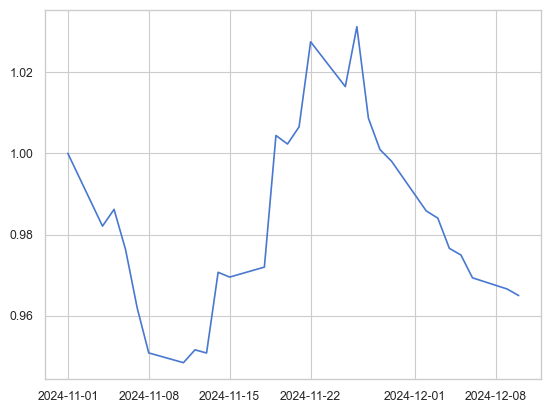

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(unit_val)
plt.show()